In [52]:
import pandas as pd

In [53]:
Fake_News_Data_1 = pd.read_csv('Fake_News_Data_1.csv')
Fake_News_Data_2 = pd.read_csv('Fake_News_Data_2.csv')
Fake_News_Data_3 = pd.read_csv('Fake_News_Data_3.csv')
Fake_News_Data_4 = pd.read_csv('Fake_News_Data_4.csv')
Fake_News_Data_5 = pd.read_csv('Fake_News_Data_5.csv')
Fake_News_Data_6 = pd.read_csv('Fake_News_Data_6.csv')
Fake_News_Data_7 = pd.read_csv('Fake_News_Data_7.csv')
Fake_News_Data_8 = pd.read_csv('Fake_News_Data_8.csv')
Fake_News_Data_9 = pd.read_csv('Fake_News_Data_9.csv')
Fake_News_Data_10 = pd.read_csv('Fake_News_Data_10.csv')
Fake_News_Data_11 = pd.read_csv('Fake_News_Data_11.csv')
Fake_News_Data_12 = pd.read_csv('Fake_News_Data_12.csv')
Fake_News_Data_13 = pd.read_csv('Fake_News_Data_13.csv')
Fake_News_Data_14 = pd.read_csv('Fake_News_Data_14.csv')

In [54]:
Fake_News_Data = pd.concat([Fake_News_Data_1, Fake_News_Data_2, Fake_News_Data_3, Fake_News_Data_4, Fake_News_Data_5, Fake_News_Data_6, Fake_News_Data_7, Fake_News_Data_8, Fake_News_Data_9, Fake_News_Data_10, Fake_News_Data_11, Fake_News_Data_12, Fake_News_Data_13, Fake_News_Data_14])

In [55]:
Fake_News_Data = Fake_News_Data.iloc[ : , 1: ]

In [56]:
Fake_News_Data.index = range(0, len(Fake_News_Data))

In [57]:
Fake_News_Data = Fake_News_Data.rename(columns={'label': 'fake'})

In [58]:
Fake_News_Data['fake'] = Fake_News_Data['fake'].astype('category')

Dataset contains three columns: Title (about the text news heading); Text (about the news content); and fake (0 = yes and 1 = no)

In [59]:
Fake_News_Data.head()

,title,text,fake
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [60]:
Fake_News_Data.describe(include='all')

,title,text,fake
count,66622,67098,67133
unique,58583,58875,2
top,Factbox: Trump fills top jobs for his administ...,,1
freq,13,683,34568


In [62]:
Fake_News_Data.isnull().sum()

title    511
text      35
fake       0
dtype: int64

In [69]:
import numpy as np

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set(rc={'figure.figsize':(10,7)})

In [74]:
prop_Fake_yes = len( Fake_News_Data.loc[ Fake_News_Data['fake']== 0 , :] ) / len(Fake_News_Data)

prop_Fake_no = len( Fake_News_Data.loc[ Fake_News_Data['fake']== 1 , :] ) / len(Fake_News_Data)

In [75]:
Fake_News_Data['proportion_Fakes'] = 0


for i in range(0, len(Fake_News_Data)):

    if Fake_News_Data['fake'][i] == 0 :

        Fake_News_Data['proportion_Fakes'][i] = prop_Fake_yes

    else :

        Fake_News_Data['proportion_Fakes'][i] = prop_Fake_no

C:\Users\Usuario\AppData\Local\Temp\ipykernel_18832\594284076.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Fake_News_Data['proportion_Fakes'][i] = prop_Fake_no


In [76]:
Fake_News_Data

,title,text,fake,proportion_Fakes
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1,0.514918
1,NaN,Did they post their votes for Hillary already?,1,0.514918
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1,0.514918
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0,0.485082
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1,0.514918
...,...,...,...,...
67128,JUDGE JEANINE SOUNDS FREE SPEECH ALARM: “They ...,Judge Jeanine lets it rip! She s concerned wit...,1,0.514918
67129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0,0.485082
67130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1,0.514918
67131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0,0.485082


[Text(0.5, 0, 'Fakes'), Text(0, 0.5, 'proportion')]

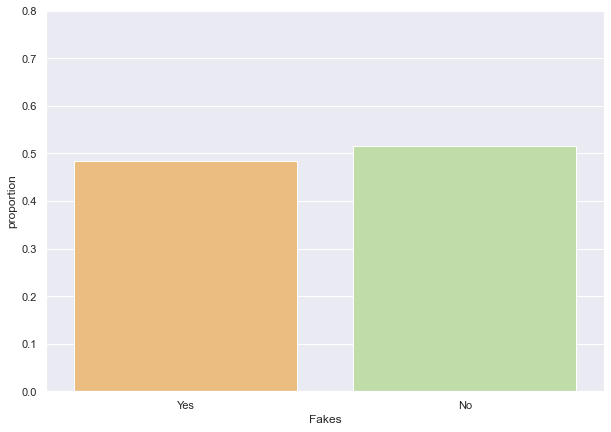

In [90]:
p1 = sns.barplot(x='fake', y='proportion_Fakes', data=Fake_News_Data, palette="Spectral") 
p1.set_yticks( np.arange(0, 0.85, 0.1)  )
p1.set_xticklabels(['Yes', 'No'])
p1.axes.set(xlabel='Fakes', ylabel='proportion')